In [1]:
import os
import pandas as pd

BASE = r"C:\Users\sidiq\Downloads\IEEE dataport dataset crowd sound\IEEE dataport dataset crowd sound\step1 normalization"

rows = []

for label in ["approval", "disapproval", "neutral"]:
    folder = os.path.join(BASE, label)
    for file in os.listdir(folder):
        if file.lower().endswith(".wav"):
            rows.append([file, label])

df = pd.DataFrame(rows, columns=["filename", "label"])
df.to_csv("IEEE_dataset.csv", index=False)

df.head()

,filename,label
0,appl0000.wav,approval
1,appl0001.wav,approval
2,appl0002.wav,approval
3,appl0003.wav,approval
4,appl0004.wav,approval


In [2]:
!pip uninstall -y resampy librosa
!pip install resampy librosa
!pip install seaborn

Found existing installation: resampy 0.4.3
Uninstalling resampy-0.4.3:
  Successfully uninstalled resampy-0.4.3
Found existing installation: librosa 0.11.0
Uninstalling librosa-0.11.0:
  Successfully uninstalled librosa-0.11.0
Defaulting to user installation because normal site-packages is not writeable
  Using cached resampy-0.4.3-py3-none-any.whl.metadata (3.0 kB)
  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
Using cached resampy-0.4.3-py3-none-any.whl (3.1 MB)
Using cached librosa-0.11.0-py3-none-any.whl (260 kB)

   -------------------- ------------------- 1/2 [librosa]
   -------------------- ------------------- 1/2 [librosa]
   -------------------- ------------------- 1/2 [librosa]
   -------------------- ------------------- 1/2 [librosa]
   -------------------- ------------------- 1/2 [librosa]
   -------------------- ------------------- 1/2 [librosa]
   ---------------------------------------- 2/2 [librosa]

Defaulting to user installation because normal site

In [3]:
# Basic Imports
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Music Imports
import librosa
import librosa.display

# Keras Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Scikit Learn Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
def segment_audio(audio, sr, segment_duration=2.0, overlap=0.5):
    segment_length = int(segment_duration * sr)
    step = int(segment_length * (1 - overlap))

    segments = []
    timestamps = []

    for start in range(0, len(audio) - segment_length, step):
        end = start + segment_length
        segments.append(audio[start:end])
        timestamps.append((start / sr, end / sr))

    return segments, timestamps


In [5]:
train_csv = pd.read_csv("IEEE_dataset.csv")
train_audio_path = r"C:\Users\sidiq\Downloads\IEEE dataport dataset crowd sound\IEEE dataport dataset crowd sound\step1 normalization"

audio_path = r"C:\Users\sidiq\Downloads\IEEE dataport dataset crowd sound\IEEE dataport dataset crowd sound\step1 normalization"



In [10]:
def extract_features_from_signal(signal, sr):
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)
    
features = []
labels = []

for index, row in train_csv.iterrows():
    filepath = os.path.join(audio_path, row["label"], row["filename"])
    signal, sr = librosa.load(filepath, sr=None)
    data = extract_features_from_signal(signal, sr)
    features.append(data)
    labels.append(row["label"])

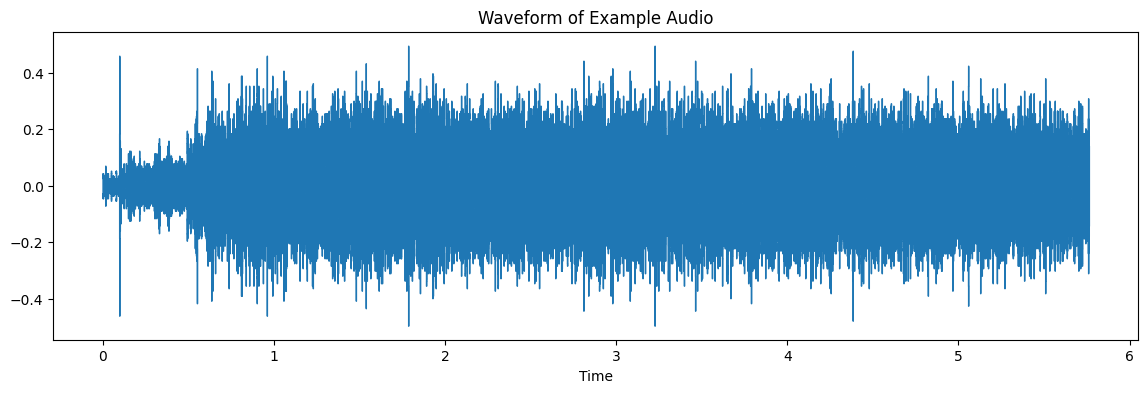

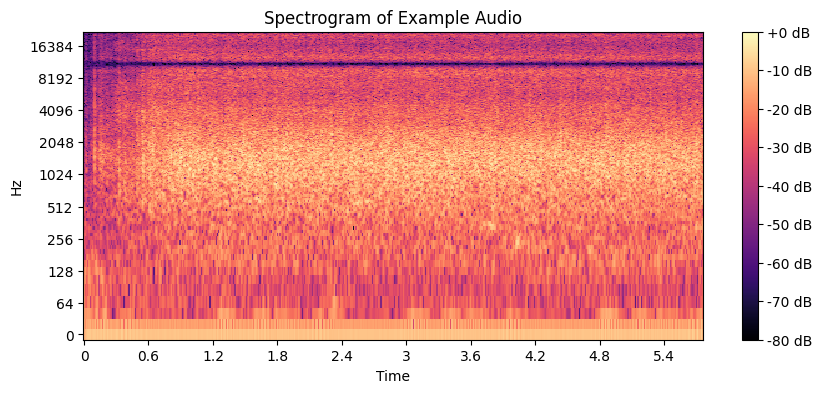

In [11]:
# Pick first example audio
first_row = train_csv.iloc[0]
example_audio = os.path.join(train_audio_path, first_row["label"], first_row["filename"])

# Load file
audio, sr = librosa.load(example_audio, sr=None)

# Waveform
plt.figure(figsize=(14, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Waveform of Example Audio')
plt.show()

# Spectrogram
plt.figure(figsize=(10, 4))
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Example Audio')
plt.show()

In [12]:
X = np.array(features)
le = LabelEncoder()
y = to_categorical(le.fit_transform(labels))

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Reshape for CNN
X_train = X_train.reshape(X_train.shape[0], 40, 1, 1)
X_val = X_val.reshape(X_val.shape[0], 40, 1, 1)

# CNN Model
model = Sequential()
model.add(Conv2D(32, (3, 1), activation='relu', input_shape=(40, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

C:\Users\sidiq\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 412ms/step - accuracy: 0.2963 - loss: 9.3147 - val_accuracy: 0.5000 - val_loss: 1.7505
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.5370 - loss: 5.6143 - val_accuracy: 0.5714 - val_loss: 4.7321
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5370 - loss: 5.9577 - val_accuracy: 0.5714 - val_loss: 3.7531
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.5741 - loss: 5.0591 - val_accuracy: 0.5714 - val_loss: 2.0323
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6111 - loss: 2.9124 - val_accuracy: 0.6429 - val_loss: 1.0490
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.5926 - loss: 3.3887 - val_accuracy: 0.7857 - val_loss: 0.9359
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6111 - loss: 2.9031 - val_accuracy: 0.7857 - val_loss: 0.9371
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.6852 - loss: 2.7799 - val_accuracy: 0.7857 - val_loss: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8571 - loss: 0.3253
Validation Loss: 0.3253
Validation Accuracy: 0.8571
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step

Classification Report:
              precision    recall  f1-score   support

    approval       0.89      1.00      0.94         8
 disapproval       1.00      0.33      0.50         3
     neutral       0.75      1.00      0.86         3

    accuracy                           0.86        14
   macro avg       0.88      0.78      0.77        14
weighted avg       0.88      0.86      0.83        14



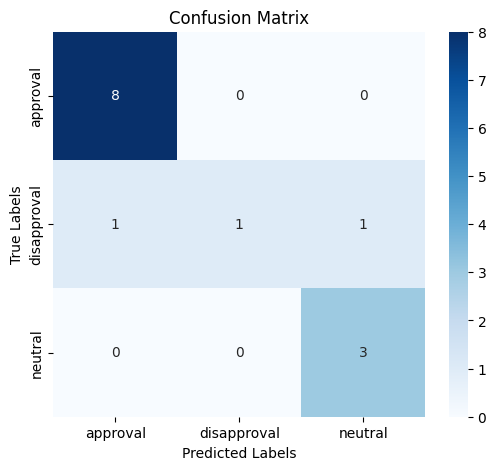

In [14]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

# Predict Classes
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Classification Report 📊
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

# Confusion Matrix 📉
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [15]:
import numpy as np
import librosa
from IPython.display import Audio  # For playing audio

# Detection System
def predict_sentiment(audio_path):
    feature = extract_features(audio_path)         # Extract MFCC features
    feature = feature.reshape(1, 40, 1, 1)         # Reshape for CNN input
    prediction = model.predict(feature)            # Predict sentiment
    predicted_label = le.inverse_transform([np.argmax(prediction)])[0]
    return predicted_label

In [25]:
audio, sr = librosa.load(r"C:\Users\sidiq\Downloads\IEEE dataport dataset crowd sound\IEEE dataport dataset crowd sound\step1 normalization\approval\appn0010.wav", sr=None)

segments, timestamps = segment_audio(audio, sr)

features = []
for seg in segments:
    feat = extract_features_from_signal(seg, sr)
    features.append(feat)

X = np.array(features)
X = X.reshape(X.shape[0], X.shape[1], 1, 1)

predictions = model.predict(X)
predicted_labels = le.inverse_transform(np.argmax(predictions, axis=1))

results = []
for time, label in zip(timestamps, predicted_labels):
    results.append({
        "start_time": time[0],
        "end_time": time[1],
        "emotion": label
    })

results


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


[{'start_time': 0.0, 'end_time': 2.0, 'emotion': np.str_('approval')},
 {'start_time': 1.0, 'end_time': 3.0, 'emotion': np.str_('approval')},
 {'start_time': 2.0, 'end_time': 4.0, 'emotion': np.str_('approval')}]

In [23]:
import pandas as pd

df = pd.DataFrame(results)
df["emotion"].value_counts(normalize=True) * 100


emotion
approval    100.0
Name: proportion, dtype: float64

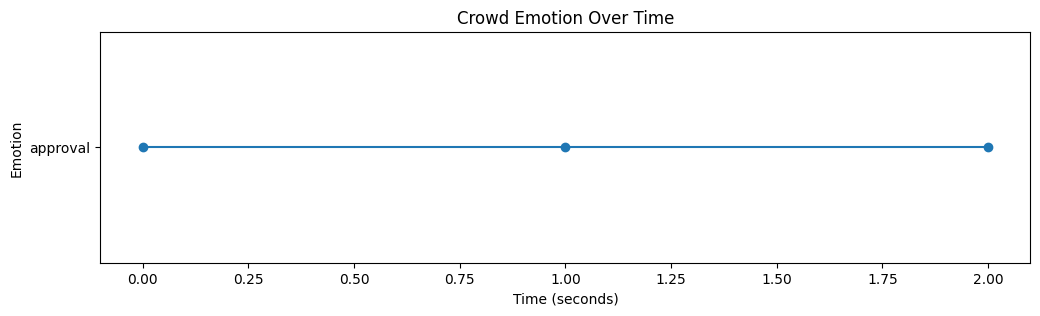

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
plt.plot(df["start_time"], df["emotion"], marker="o")
plt.xlabel("Time (seconds)")
plt.ylabel("Emotion")
plt.title("Crowd Emotion Over Time")
plt.show()
